In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [6]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df_y = df['Survived']
df_x = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived'], axis = 'columns')


In [8]:
df_x

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [13]:
le = LabelEncoder()
df_x['Sex_le'] = le.fit_transform(df_x['Sex'])
df_x

,Pclass,Sex,Age,Sex_le
0,3,male,22.0,1
1,1,female,38.0,0
2,3,female,26.0,0
3,1,female,35.0,0
4,3,male,35.0,1
...,...,...,...,...
886,2,male,27.0,1
887,1,female,19.0,0
888,3,female,NaN,0
889,1,male,26.0,1


In [14]:
for feature in df_x.columns:
  feature_null_count = df[feature].isna().sum()
  print('Total Nulls Count for the column {} are {}.'.format(feature,feature_null_count))

Total Nulls Count for the column Pclass are 0.
Total Nulls Count for the column Sex are 0.
Total Nulls Count for the column Age are 177.
Total Nulls Count for the column Sex_le are 0.


In [33]:
age_mean = df_x.groupby(['Sex_le','Pclass'])['Age'].median()
age_mean

Sex_le  Pclass
0       1         35.0
        2         28.0
        3         21.5
1       1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

Best way is to replace NaN in Age based on Grouped data as in age_mean but for now doing Mean() on the Age Column.

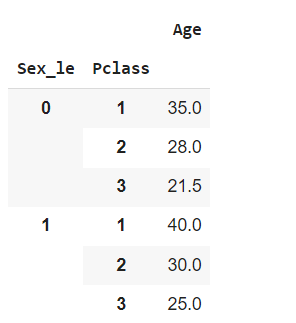

In [57]:
df_x.Age = df_x.Age.fillna(df_x.Age.mean()).astype('int64')
df_x_final = df_x.drop(['Sex'], axis= 'columns')

In [58]:
df_x_final

,Pclass,Age,Sex_le
0,3,22,1
1,1,38,0
2,3,26,0
3,1,35,0
4,3,35,1
...,...,...,...
886,2,27,1
887,1,19,0
888,3,29,0
889,1,26,1


In [60]:
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x_final, df_y, test_size=0.2)

In [63]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
model.score(X_test,y_test)

0.7932960893854749

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [70]:
model.predict([[1,38,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])